# Plotting the output from Cumulative event counter

Notebook just for compiling raw listed cell/event counter data as heatmaps

In [1]:
import csv, glob, re, os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
from tqdm import tqdm
import render
import calculate_radial_analysis as calculate

# Compile bulk analysis

N_cells, N_events, P_events, cropped versions, comparative versions with colour bar limits, coefficient of variation calculations, a statistical relevance calculation based on that and finally a combined P_events above background (probability - control probability)

### Set parameters

In [9]:
t_range = 800
radius = 800
num_bins = 20
save_parent_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_{}.{}.{}'.format(radius, t_range, num_bins)

### Either compile from raw lists (temp as iterable over different configs

In [2]:
for config in ['800.800.8', '800.800.6', '600.600.8', '600.600.10', '500.500.5' '1000.1000.10', '1000.1000.6']:
    radius = int(config.split('.')[0])
    t_range = int(config.split('.')[1])
    num_bins = int(config.split('.')[2])
    ### canon
    raw_files_dir = os.path.join('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/canon')
    N_cells, N_events, P_events = render.cumulative_kymo_compiler(raw_files_dir, radius, t_range, num_bins)
    limit = np.amax(P_events)
    N = int(len(os.listdir(raw_files_dir))/2)

    ### control 
    raw_files_dir = os.path.join('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control')
    N_cells_c, N_events_c, P_events_c = render.cumulative_kymo_compiler(raw_files_dir, radius, t_range, num_bins)
    limit_c = np.amax(P_events_c)
    N_c = int(len(os.listdir(raw_files_dir))/2)

    ### save out raw arrays for coeff var
    fn = os.path.join(save_parent_dir,'arrays/canon_N_cell_N_event_P_event_{}.{}.{}.npz'.format(radius,t_range, num_bins))
    if not os.path.exists(os.path.dirname(fn)):
        os.makedirs(os.path.dirname(fn))
    fn_c = os.path.join(save_parent_dir, 'arrays/control_N_cell_N_event_P_event_{}.{}.{}.npz'.format(radius,t_range, num_bins))
    if not os.path.exists(os.path.dirname(fn_c)):
        os.makedirs(os.path.dirname(fn_c))
    np.savez(fn, N_cells, N_events, P_events)
    np.savez(fn_c, N_cells_c, N_events_c, P_events_c)

### Or load from previously compiles .npz stacks of N_cells, N_events, P_events

In [ ]:
### load npz
with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/attempt5_arrays_only_800.800.20/arrays/canon_N_cell_N_event_P_event_800.800.20.npz') as data:
    N_cells = data['arr_0']
    N_events = data['arr_1']
    P_events = data['arr_2']
with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/attempt5_arrays_only_800.800.20/arrays/control_N_cell_N_event_P_event_800.800.20.npz') as data:
    N_cells_c = data['arr_0']
    N_events_c = data['arr_1']
    P_events_c = data['arr_2']
N_c = 10491
N = 1839
limit_c = np.amax(P_events_c)
limit = np.amax(P_events)
cbar_lim = tuple((0, max(limit_c, limit)))

Thank you for choosing MEGAPLOT


Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.20/uncrop_unlim/scr_apop_wt_div/Spatiotemporal dist. of probability of wild-type divisions 
 around Scribble apoptoses (N=1839) 800.800.20.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.20/uncrop_unlim/scr_apop_wt_div/Spatiotemporal dist. of wild-type divisions 
 around Scribble apoptoses (N=1839) 800.800.20.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.20/uncrop_unlim/scr_apop_wt_div/Spatiotemporal dist. of wild-type cells 
 around Scribble apoptoses (N=1839) 800.800.20.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.20/uncrop_unlim/wt_cont_wt_div/Spatiotemporal dist. of probability of wild-type divisions 
 aro

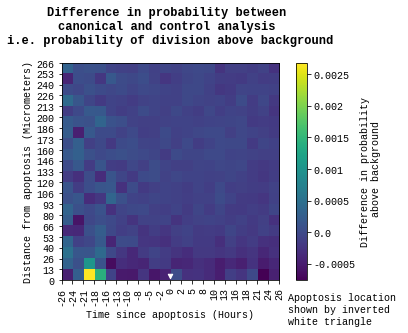

In [6]:
render.MEGAPLOT(N_cells, N_events, P_events, N_cells_c, N_events_c, P_events_c, N, N_c, limit, limit_c, cbar_lim)

# Iterating over several different scales with bulk output

starting dimensions radius, t_range, num_bins: 200 200 10
Thank you for choosing MEGAPLOT


Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/uncrop_unlim/scr_apop_wt_div/Spatiotemporal dist. of probability of wild-type divisions 
 around Scribble apoptoses (N=1839) 200.200.10.pdf already exists, saving as updated copy
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/uncrop_unlim/scr_apop_wt_div/Spatiotemporal dist. of probability of wild-type divisions 
 around Scribble apoptoses (N=1839) 200.200.10 (updated 20210804-203054).pdf
Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/uncrop_unlim/scr_apop_wt_div/Spatiotemporal dist. of wild-type divisions 
 around Scribble apoptoses (N=1839) 200.200.10.pdf already exists, saving as updated copy
Plot saved at  /home/nathan/data/kraken/h2b/g

/home/nathan/analysis/cell-comp-analysis/radial_analysis/render.py:670: RuntimeWarning: divide by zero encountered in true_divide
  cv = np.nan_to_num(np.sqrt((1-P_events)/(P_events*N_cells)), posinf = 1)


Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/CV/scr_apop_wt_div/Coefficient of variation of probability of wild-type divisions 
 around Scribble apoptoses (N=1839) 200.200.10 (updated 20210804-203058).pdf
Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/CV/wt_cont_wt_div/Coefficient of variation of probability of wild-type divisions 
 around wild-type random time points (N=10491) 200.200.10.pdf already exists, saving as updated copy


/home/nathan/analysis/cell-comp-analysis/radial_analysis/render.py:692: RuntimeWarning: divide by zero encountered in true_divide
  cv_c = np.nan_to_num(np.sqrt(((1-P_events_c)/(P_events_c*N_cells_c))), posinf = 1)


Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/CV/wt_cont_wt_div/Coefficient of variation of probability of wild-type divisions 
 around wild-type random time points (N=10491) 200.200.10 (updated 20210804-203058).pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/CV/wt_cont_wt_div/Statisticall relevant areas of probability of wild-type divisions 
 around wild-type random time points (N=10491) 200.200.10.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/combined/Difference in probability between 
canonical and control analysis 
i.e. probability of division above background 200.200.10.pdf
Plots saved out
starting dimensions radius, t_range, num_bins: 400 400 10
Thank you for choosing MEGAPLOT


Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_outpu

Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/CV/scr_apop_wt_div/Coefficient of variation of probability of wild-type divisions 
 around Scribble apoptoses (N=1839) 800.800.10.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/CV/wt_cont_wt_div/Coefficient of variation of probability of wild-type divisions 
 around wild-type random time points (N=10491) 800.800.10.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/CV/wt_cont_wt_div/Statisticall relevant areas of probability of wild-type divisions 
 around wild-type random time points (N=10491) 800.800.10.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/combined/Difference in probability between 
canonical and control analysis 
i.e. probab

/home/nathan/analysis/cell-comp-analysis/radial_analysis/render.py:670: RuntimeWarning: divide by zero encountered in true_divide
  cv = np.nan_to_num(np.sqrt((1-P_events)/(P_events*N_cells)), posinf = 1)


Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_600.600.20/CV/scr_apop_wt_div/Coefficient of variation of probability of wild-type divisions 
 around Scribble apoptoses (N=1839) 600.600.20.pdf


/home/nathan/analysis/cell-comp-analysis/radial_analysis/render.py:692: RuntimeWarning: divide by zero encountered in true_divide
  cv_c = np.nan_to_num(np.sqrt(((1-P_events_c)/(P_events_c*N_cells_c))), posinf = 1)


Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_600.600.20/CV/wt_cont_wt_div/Coefficient of variation of probability of wild-type divisions 
 around wild-type random time points (N=10491) 600.600.20.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_600.600.20/CV/wt_cont_wt_div/Statisticall relevant areas of probability of wild-type divisions 
 around wild-type random time points (N=10491) 600.600.20.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_600.600.20/combined/Difference in probability between 
canonical and control analysis 
i.e. probability of division above background 600.600.20.pdf
Plots saved out
starting dimensions radius, t_range, num_bins: 800 800 20
Thank you for choosing MEGAPLOT


Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/

Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.20/CV/wt_cont_wt_div/Coefficient of variation of probability of wild-type divisions 
 around wild-type random time points (N=10491) 800.800.20 (updated 20210804-203118).pdf
Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.20/CV/wt_cont_wt_div/Statisticall relevant areas of probability of wild-type divisions 
 around wild-type random time points (N=10491) 800.800.20.pdf already exists, saving as updated copy
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.20/CV/wt_cont_wt_div/Statisticall relevant areas of probability of wild-type divisions 
 around wild-type random time points (N=10491) 800.800.20 (updated 20210804-203119).pdf
Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.80

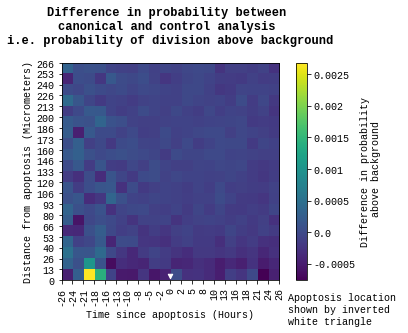

In [3]:
for config in ['200.200.10', '400.400.10', '800.800.10', '600.600.20', '800.800.20']:
    radius = int(config.split('.')[0])
    t_range = int(config.split('.')[1])
    num_bins = int(config.split('.')[2])
    print('starting dimensions radius, t_range, num_bins:',radius, t_range, num_bins)
    save_parent_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_{}.{}.{}'.format(radius, t_range, num_bins)
    ### load npz
    with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/canon_N_cell_N_event_P_event_{}.{}.{}.npz'.format(radius, t_range, num_bins, radius, t_range, num_bins)) as data:
        N_cells = data['arr_0']
        N_events = data['arr_1']
        P_events = data['arr_2']
    with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/control_N_cell_N_event_P_event_{}.{}.{}.npz'.format(radius, t_range, num_bins, radius, t_range, num_bins)) as data:
        N_cells_c = data['arr_0']
        N_events_c = data['arr_1']
        P_events_c = data['arr_2']
    N_c = 10491
    N = 1839
    limit_c = np.amax(P_events_c)
    limit = np.amax(P_events)
    cbar_lim = tuple((0, max(limit_c, limit)))
    render.MEGAPLOT(N_cells, N_events, P_events, N_cells_c, N_events_c, P_events_c, N, N_c, limit, limit_c, cbar_lim, radius, t_range, num_bins, save_parent_dir)

# Single probability heatmap (skip for bulk generation)

### Set parent directory of raw .csv files

In [4]:
raw_files_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control'

### Set the dimensions of the heatmap

In [2]:
radius, t_range, num_bins = 800,800,10

In [4]:
### CANON
focal_cell = 'Scr'
focal_event = 'APOPTOSIS'
subject_cell = 'wt'
subject_event = 'DIVISION'

In [7]:
### CONTROL
focal_cell = 'wt'
focal_event = 'control'
subject_cell = 'wt'
subject_event = 'DIVISION'

### Compile single cumulative probability heatmap

In [ ]:
N_cells, N_events, P_events = render.cumulative_kymo_compiler(raw_files_dir, radius, t_range, num_bins)

  0%|          | 0/10491 [00:00<?, ?it/s]

In [ ]:
render.auto_plot_cumulative(P_events,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)